In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import data set

df = pd.read_csv("makeup_data.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          931 non-null    int64  
 1   id                  931 non-null    int64  
 2   brand               919 non-null    object 
 3   name                931 non-null    object 
 4   price               917 non-null    float64
 5   price_sign          368 non-null    object 
 6   currency            368 non-null    object 
 7   image_link          931 non-null    object 
 8   product_link        931 non-null    object 
 9   website_link        931 non-null    object 
 10  description         906 non-null    object 
 11  rating              340 non-null    float64
 12  category            507 non-null    object 
 13  product_type        931 non-null    object 
 14  tag_list            931 non-null    object 
 15  created_at          931 non-null    object 
 16  updated_

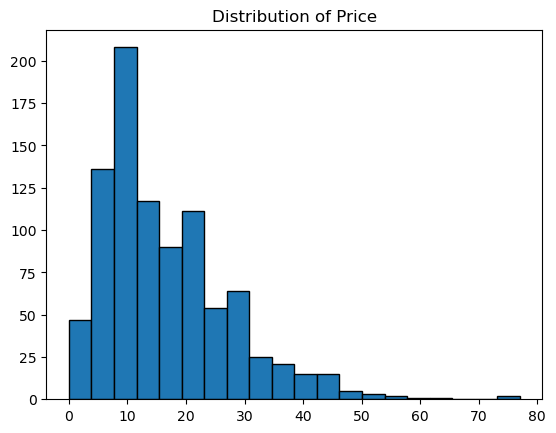

In [3]:
# How are product prices distributed?

plt.hist(df['price'], bins=20, edgecolor='black')
plt.title('Distribution of Price')

plt.show()

In [4]:
# What are the top 5 highest rated brands that have a minimum of 30 products?

# Step 1: Filter out brands with less than 30 products
filtered_df = df.groupby('brand').filter(lambda x: len(x) > 30)

# Step 2: Group by brand, calculate mean rating, sort by highest value descending and limit output to 5
top_five = filtered_df.groupby("brand")["rating"].mean().sort_values(ascending=False).head(5)
        
print(top_five)

brand
covergirl             4.427273
l'oreal               4.323333
nyx                   4.318182
physicians formula    4.307692
maybelline            4.082609
Name: rating, dtype: float64


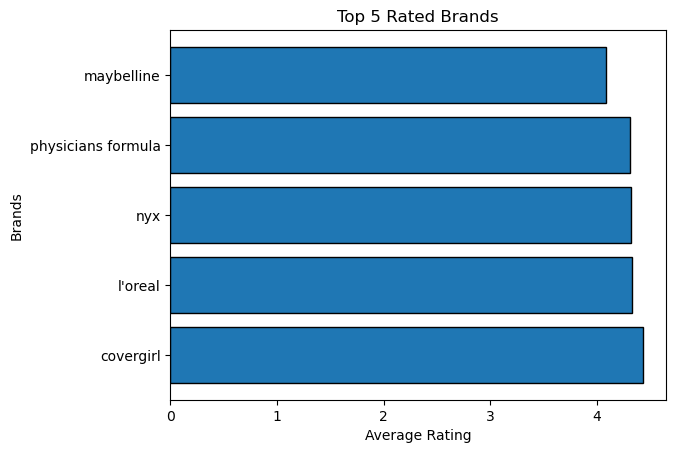

In [5]:
# Bar chart of the top 5 rated brands with minimum 30 products by average rating

plt.barh(top_five.index, top_five.values, edgecolor='black')
plt.title("Top 5 Rated Brands")
plt.xlabel("Average Rating")
plt.ylabel("Brands")

plt.show()

In [6]:
# What is the distribution of product types the top 5 brands with more than 30 products are selling?

top_five_brands_product_types = df[df["brand"].isin(["covergirl", "l'oreal", "nyx", "physicians formula", "maybelline"])].groupby("product_type").size()

print(top_five_brands_product_types)

product_type
blush          33
bronzer        24
eyebrow        18
eyeliner       70
eyeshadow      17
foundation     67
lip_liner      14
lipstick       57
mascara        48
nail_polish    13
dtype: int64


Text(0.5, 1.0, 'Top 5 Brands - Split of Product Types')

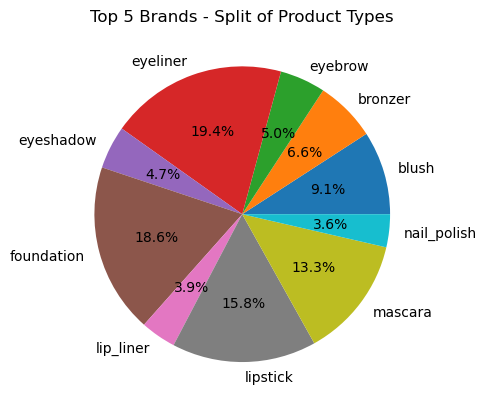

In [7]:
# Show a pie chart showing the split of product types (25% pop, 40% EDM etc.)

top_five_brands_product_types.plot(kind="pie", autopct="%1.1f%%")
plt.title("Top 5 Brands - Split of Product Types")